# Firm Dynamics

## Problem Set: Firm Entry and Exit

Prof. Thomas Winberry

Author: Martina Fraschini

### Exercise 1: Recursive Competitive Equilibrium

A steady state recursive competitive equilibrium of this economy is a set of incumbent value functions $v(\epsilon,k)$, policy rules $k'(\epsilon,k)$ and $n(\epsilon,k)$, and a mass of entrants per period $m^*$, a measure of active firms at the beginning of the period $g^*(\epsilon,k)$, and a real wage $\omega^*$ such that:

1) Incumbent firms maximize their firm value: $$ v(\epsilon,k)=\max\left\{(1-\delta)k, v^1(\epsilon,k)-c_f\right\} $$
$$$$
$$ v^1(\epsilon,k)=\max_{k',n} e^\epsilon k^\theta n^\nu - \omega^*n-(k'-(1-\delta)k)-\frac{\varphi}{2}\left(\frac{k'}{k}-(1-\delta)\right)^2k+\beta E\left[v(\epsilon',k')\right]$$

2) The free entry condition holds: $$ c_e \leq \int v(\epsilon,0)\nu(d\epsilon) $$ with $ c_e = \int v(\epsilon,0)\nu(d\epsilon) $ if $m^*>0$.

3) The labor market clears: $$ N(g)=\int n(\epsilon,k,g)g(\epsilon,k)d\epsilon dk $$

4) The measure of active firms $g^*(\epsilon,k)$ is stationary: $g^*(\epsilon,k)$ satisfies the following law of motion for distribution $$g^{*}\left(\varepsilon^{\prime}, k^{\prime}\right)=\int X(\varepsilon, k) \operatorname{Pr}\left(\varepsilon^{\prime} | \varepsilon\right) \mathbb{1}\left\{k^{\prime}(\varepsilon, k)=k^{\prime}\right\} d g^{*}(\varepsilon, k)+m^{*} \operatorname{Pr}\left(\nu=\varepsilon^{\prime}\right)$$

### Exercise 2: Representative Agent Steady State

The steady state of the representative agent is characterized by the following equations:

$$ \bar{r}=\frac{1}{\beta}-(1-\delta) $$

$$ \bar{r} = \theta \bar{k}^{\theta-1}\bar{N}^\nu $$

$$ \bar{\omega}=\nu \bar{k}^\theta\bar{N}^{\nu-1} $$

$$ \bar{c}+\delta \bar{k}=\bar{k}^\theta\bar{N}^\nu $$

In [1]:
# import packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

# define system of characterizing equations
def charact_eq(x, p):
    beta, delta, theta, nu, N = p
    r = (1/beta) - (1-delta)
    return [r - theta * x[1]**(theta-1) * N**nu,
            x[2] - nu * x[1]**theta * N**(nu-1),
            x[0] + delta*x[1] - x[1]**theta * N**nu]

# solve the system
param = [.96, .1, .21, .64, .6]
X = optimize.root(charact_eq,[.5,.5,.5], args=param)

# present results
c_star, k_star, w_star = X.x
print("Steady state values:\n")
print("{:<20}{:<5}{:<5}".format('Wage rate','w',round(w_star,4)))
print("{:<20}{:<5}{:<5}".format('Capital stock','k',round(k_star,4)))

Steady state values:

Wage rate           w    0.783
Capital stock       k    1.0881


### Exercise 3: Incumbent Firms' Decision Rules [incomplete]

In [19]:
# import packages
import tauchen
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

# define grid of values for capital k, for labor and for shock s
Nk = 30
k_low = .01
k_high = 10.
k_grid = np.linspace(k_low, k_high, Nk)

Ns = 10
mu = 0
rho = .9
sigma = .02
baseSigma = sigma/np.sqrt(1-rho**2)
A_grid, TP = tauchen.tauchenhussey(Ns, mu, rho, sigma, baseSigma)
A_grid = A_grid.T

# define parameters
theta = .21
nu = .64
beta = .96
delta = .1
phi = .5
cf = .01
tol = 1e-8
max_iterations = 10000

# initialize value function
V_init = np.ones([Nk,Ns]) * -9999999

def vf_update(V_old):
    V_new = np.zeros_like(V_old)
    policy_k = np.zeros_like(V_old)
    
    for i in range(Nk):
        for s in range(Ns):
            a = A_grid[s]
            k = k_grid[i]
            expectation = 0
            for ss in range(Ns):
                expectation += TP[s,ss] * V_old[i,ss]
            n = (w_star/(nu * np.exp(a) * k**theta))**(1/(nu-1))
            V1 = np.exp(a)*k**theta*n**nu - w_star*n - (k_grid - (1-delta)*k) + (phi/2)*(k_grid/k - (1-delta))**2*k + beta*expectation
            V_action = np.amax(V1)
            if V_action - cf < (1-delta)*k:
                V_new[i,s] = (1-delta)*k
                policy_k[i,s] = 0.
            else:
                ind = np.argmax(V1)
                V_new[i,s] = V_action - cf
                policy_k[i,s] = k_grid[ind]
    
    return V_new, policy_k

# iterate until convergence
V = V_init.copy()

for iteration in range(max_iterations):
    V_new, policy_k = vf_update(V)
    difference = np.max(abs(V_new - V))
    
    V = V_new.copy()

    if difference < tol:
        print('Converged after iteration {}'.format(iteration + 1))
        
        break

Converged after iteration 645


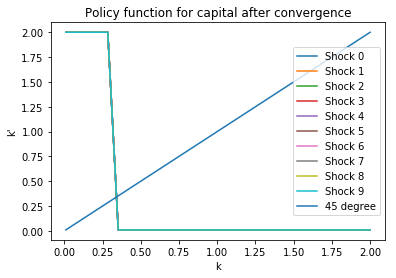

In [18]:
plt.figure()
for s in range(Ns):
    plt.plot(k_grid, policy_k[:,s], label="Shock {}".format(s))
plt.plot(k_grid, k_grid, label="45 degree")
plt.xlabel('k')
plt.ylabel("k'")
plt.legend()
plt.title('Policy function for capital after convergence')
plt.show()